<a href="https://colab.research.google.com/github/ASTRONOE/Common_Data_Analysis/blob/KreativStorm/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analysis Hands-On Program - KreativStorm**
##WEEK 3 ASSIGNMENT

In [ ]:
#ensure pyreadstat for spss is installed!!
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.1 MB/s eta 0:00:00


In [ ]:
#load libraries
import numpy as np
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from scipy.stats import levene, median_test, ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.multivariate.manova import MANOVA
from google.colab import files

In [ ]:
sav_file = files.upload() #upload file from explorer

Saving Birthweight_reduced_kg_SPSS.sav to Birthweight_reduced_kg_SPSS.sav


In [ ]:
Df, meta = prs.read_sav("Birthweight_reduced_kg_SPSS.sav") #load file

In [ ]:
#print dataframe summary
print(Df.shape)
print(Df.info())

(42, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     float64
 1   Headcirc     42 non-null     float64
 2   Length       42 non-null     float64
 3   Birthweight  42 non-null     float64
 4   Gestation    42 non-null     float64
 5   mage         42 non-null     float64
 6   smoker       42 non-null     float64
 7   mheight      42 non-null     float64
 8   mppwt        42 non-null     float64
 9   fage         42 non-null     float64
 10  fedyrs       42 non-null     float64
 11  fnocig       42 non-null     float64
 12  fheight      42 non-null     float64
 13  lowbwt       42 non-null     float64
 14  mage35       42 non-null     float64
 15  mnocig       42 non-null     float64
dtypes: float64(16)
memory usage: 5.4 KB
None


In [ ]:
# Accessing the variable names
print("Variable names:\n", meta.column_names)

# Accessing the variable labels
print("Variable labels:\n", meta.variable_value_labels)

# Accessing the detailed information about each variable
print("Variable information:")
print(meta.column_names_to_labels)

Variable names:
 ['ID', 'Headcirc', 'Length', 'Birthweight', 'Gestation', 'mage', 'smoker', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight', 'lowbwt', 'mage35', 'mnocig']
Variable labels:
 {'smoker': {0.0: 'Non-smoker', 1.0: 'Smoker'}, 'lowbwt': {0.0: 'Not low birthweight', 1.0: 'Low birthweight'}, 'mage35': {0.0: 'Aged < 35', 1.0: 'Aged 35+'}}
Variable information:
{'ID': 'Baby ID', 'Headcirc': 'Head circumference (cm)', 'Length': 'Length of baby (cm)', 'Birthweight': 'Birthweight (kg)', 'Gestation': 'Gestational age at birth (weeks)', 'mage': 'Maternal age', 'smoker': None, 'mheight': 'Maternal height (cm)', 'mppwt': "Mother's pre-pregnancy weight (kg)", 'fage': "Father's age", 'fedyrs': 'Years father was in education', 'fnocig': 'Number of cigarettes smoked per day by father', 'fheight': "Father's height (cm)", 'lowbwt': 'Low birthweight baby', 'mage35': 'Mother aged over 35', 'mnocig': 'Number of cigarettes smoked per day by mother'}


In [ ]:
Df.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,0.0,162.0,57.0,23.0,10.0,35.0,179.0,0.0,0.0,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,0.0,171.0,62.0,19.0,12.0,0.0,183.0,0.0,0.0,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,0.0,172.0,58.0,31.0,16.0,25.0,185.0,0.0,1.0,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,0.0,174.0,68.0,26.0,14.0,25.0,189.0,0.0,0.0,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,0.0,175.0,66.0,30.0,12.0,0.0,184.0,0.0,0.0,0.0


In [ ]:
Df.describe()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,34.595238,51.333333,3.312857,39.190476,25.547619,0.523810,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238,9.428571
std,467.616186,2.399792,2.935624,0.603895,2.643336,5.666342,0.505487,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102,12.511737
min,27.000000,30.000000,43.000000,1.920000,33.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000,0.000000
25%,537.250000,33.000000,50.000000,2.940000,38.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000,0.000000
50%,821.000000,34.000000,52.000000,3.295000,39.500000,24.000000,1.000000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000,4.500000
75%,1269.500000,36.000000,53.000000,3.647500,41.000000,29.000000,1.000000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000,15.750000
max,1764.000000,39.000000,58.000000,4.570000,45.000000,41.000000,1.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000,50.000000


`Q1. In your own words, describe what a residual is in linear regression.`

A residual is the difference between the observed values and the predicted values. It is indicated by the distance between the data points of the dependent variable and the regression line. It is used to calculate the squared or absolute errors between the actual and expected values.

`Q2. If you know that your residual data follow the below pattern, are your data better approximated with a linear model for the lower values of independent variable or higher values of independent variable and why?`

The data is better approximated with the lower values because the proximity to the the line implies stronger positive correlation and
lower errors of expectancy.

`Q3. What is the difference between R2 and adjusted R2?`

R-squared takes account the residual difference between the dependent and independent variables or predictors without taking into the strengths or biases of the individual independent variables.

Adjusted R-squared takes the strengths the different independent variables or factors have on the dependent variable into account, such that proportionally weaker variables can reduce the R-squared value.

`Q4. Is there independence of observations if you are trying to predict baby length with mother’s height?`
* Yes
* No

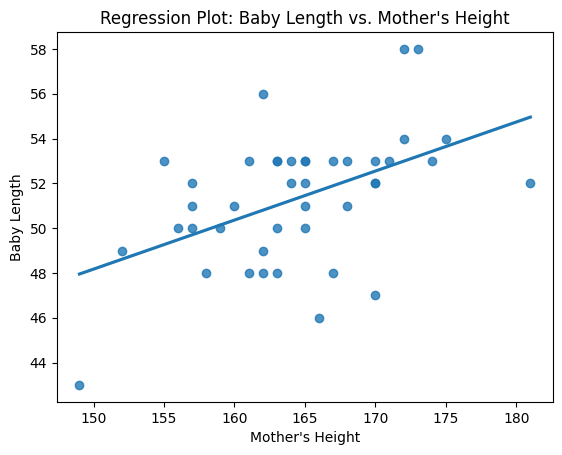

In [ ]:
# Create the regression plot
sb.regplot(x='mheight', y='Length', data=Df, ci=None)

# Add labels and title
plt.xlabel("Mother's Height")
plt.ylabel("Baby Length")
plt.title("Regression Plot: Baby Length vs. Mother's Height")

# Show the plot
plt.show()

In [ ]:
X = Df['mheight']
y = Df['Length']

# Add a constant term to the independent variable to fit an intercept in the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

#get residuals
residuals = model.resid

# Perform the Durbin-Watson test
dw = durbin_watson(residuals)
dw

1.7244869271425978

`Answer` Yes

`Q5. Justify the above answer.`

The resulting value from the Durbin-Watson test, 1.72 indicates that there is slight independence between the length of babies and mothers' heights. The little autocorrelation present could be caused by some of the babies being almost exactly 53cm long.

`Q6. Do residual data show homoscedasticity?`

`Answer` Yes. There is homoscedasticity in the plot.

`Q7. Justify the above answer.`

There are very few patterns scattered all over the plot. They are mostly indiscernable. But the overall plot shows that the data is homoscedastic.

`Q8. What is the value of R2 and what does this tell you?`

In [ ]:
model.rsquared

0.23521763061139123

The value of R-squared is 0.23, which means that the mothers' heights contribute to 23% of the babies lengths.

`Q9. Can you consider the relationship between mother’s height and baby length a statistically significant linear relationship and why?`

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 04 Aug 2023   Prob (F-statistic):            0.00113
Time:                        10:46:40   Log-Likelihood:                -98.689
No. Observations:                  42   AIC:                             201.4
Df Residuals:                      40   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3342     10.271      1.493      0.143      -5.425      36.093
mheight        0.2189      0.062      3.507      0.001       0.093       0.345
==============================================================================
Omnibus:                        0.736   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.358
Skew:                          -0.224   Prob(JB):                        0.836
Kurtosis:                       3.059   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Df.mheight.corr(Df.Length)

0.48499240263265053

The correlation and p-value of the F-statistic are 0.48 and 0.00113 (< 0.05)respectively. This indicates that that there is a significant linear relationship between both variables.

`Q10. Having the ANOVA table for the linear regression in mind, what is the null and alternative hypothesis in this case?`

The null hypothesis says there is no relationship between the mothers' heights and babies' lengthd. The alternative hypothesis says otherwise; there is a relationship between mothers' heights and baby length.


`Q12. What does the value of b1 tell you in practical terms?`

In [ ]:
model.params['const']

15.334189031505502

In [ ]:
model.params['mheight']

0.2189031505250863

It tells us that the slope of the relation is positive. It means that on average there is an 0.219cm in a baby's length for every increase in his mom's height.



`Q13. Could you claim the same for the mother’s height in the range between 140cm and 145cm and why?`

In [ ]:
heights_to_predict = [140, 145]
X_predict = sm.add_constant(heights_to_predict)
predicted_lengths = model.predict(X_predict)

# Calculate the slope
slope = (predicted_lengths[1] - predicted_lengths[0]) / (heights_to_predict[1] - heights_to_predict[0])

print("Slope between mothers' heights 140 and 145:", slope)


Slope between mothers' heights 140 and 145: 0.2189031505250867


Yes. Using Python, I calculated the slope using the gradient formula, (predicted_y2 - predicted_y1)/(145 - 140) and arrived at 0.219 again.

`Q14. According to this model, what is the prediction of baby length for mother’s height of 170cm?`

In [ ]:
x_predict = sm.add_constant([0, 170])  # Create an array with constant and the height to predict
predicted_length = model.predict(x_predict)

print("Predicted length for a mother with height 170:", predicted_length[1])

Predicted length for a mother with height 170: 52.547724620770175


`Q15. Report on your findings for predicting baby length with mother’s height.`

Using Python's OLS formula from the statsmodels library, I could confirm that the intercept or constant is 15.3cm, and the length of a baby of a mother with height of 170cm is around 52.5cm. The regression line also agrees with this.

`Q16. Can you predict baby length with father’s age? Why?`

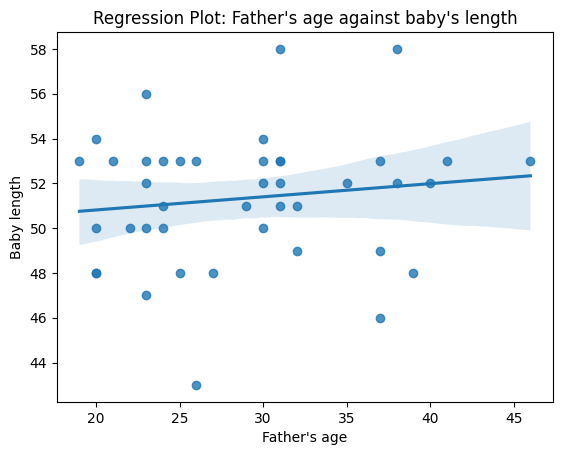

In [ ]:
# Create the regression plot
sb.regplot(x='fage', y='Length', data=Df)

# Add labels and title
plt.xlabel("Father's age")
plt.ylabel("Baby length")
plt.title("Regression Plot: Father's age against baby's length")

# Show the plot
plt.show()

In [ ]:
# Assuming 'df' is your pandas DataFrame with 'baby_length' as the dependent variable and 'mother_height' as the independent variable
X1 = Df['fage']
y1 = Df['Length']

# Add a constant term to the independent variable to fit an intercept in the regression model
X1 = sm.add_constant(X1)

# Fit the linear regression model
model1 = sm.OLS(y1, X1).fit()

#get residuals
residuals1 = model1.resid
print(Df['fage'].corr(Df['Length']))

0.13718436501767456


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7672
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.386
Time:                        10:46:40   Log-Likelihood:                -103.92
No. Observations:                  42   AIC:                             211.8
Df Residuals:                      40   BIC:                             215.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6374      1.989     24.959      0.000      45.618      53.657
fage           0.0587      0.067      0.876      0.386      -0.077       0.194
==============================================================================
Omnibus:                        2.432   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.407
Skew:                          -0.265   Prob(JB):                        0.495
Kurtosis:                       3.724   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The age of the father and the length of a baby have continuous values. We use three metrics to check if it is possible to calculate the length of a baby using father's age.
Regression plot: The line is almost horizontal, and the scatterplot is non-linear.
Correlation coefficient: 0.13. It is too weak.
Durbin-Watson test: 1.73. It is very homoscedastic.
p-value of F-statistic: 0.13. It is above the p.value.

These results unanimously agree that there is no way fathers' age can have significant effect on baby length.

`Q17. What does homogeneity of variance mean and why is it important assumption of an independent t-test?`


Homogeneity of variance implies that the variance of a sample size is equally distributed all across the mean such that the spread often looks symmetric. This is crucial in an independent t-test because if there is an imbalance between the two groups involved, erroneous results and conclusions might appear, leading to possible type 1 or type 2 errors.

*The assumption of homogeneity of variance is an assumption of the independent samples t-test and ANOVA stating that all comparison groups have the same variance.  The independent samples t-test and ANOVA utilize the t and F statistics respectively, which are generally robust to violations of the assumption as long as group sizes are equal.  Equal group sizes may be defined by the ratio of the largest to smallest group being less than 1.5.  If group sizes are vastly unequal and homogeneity of variance is violated, then the F statistic will be biased when large sample variances are associated with small group sizes.  When this occurs, the significance level will be underestimated, which can cause the null hypothesis to be falsely rejected.  On the other hand, the F statistic will be biased in the opposite direction if large variances are associated with large group sizes.  This would mean that the significance level will be overestimated.  This does not cause the same problems as falsely rejecting the null hypothesis, however, it can cause a decrease in the power of the test.*

Homogeneity of variance, also known as homoscedasticity, refers to the condition where the variance of the dependent variable is approximately constant across different levels of the independent variable. In other words, the spread or dispersion of data points around the mean should be similar across all groups or conditions of the independent variable.

In the context of an independent t-test, homogeneity of variance is an important assumption because the t-test relies on the assumption that the variances of the two groups being compared are equal. When the variances are not equal (i.e., when there is violation of homogeneity of variance), the standard errors of the mean in each group can be different, leading to inaccurate results and potentially incorrect conclusions.

If the assumption of homogeneity of variance is violated in an independent t-test, the t-test may become less reliable and less powerful. Specifically, if the group with the larger variance has a larger standard error, it may contribute more noise to the t-test, making it less sensitive to detect true differences between the group means.

To assess the homogeneity of variance assumption, researchers often use statistical tests such as Levene's test or the Brown-Forsythe test. These tests compare the variances of the groups and provide a p-value that indicates whether there is a significant difference in variances between the groups. If the p-value is less than the chosen significance level (often 0.05), it suggests a violation of the assumption of homogeneity of variance.

If the assumption of homogeneity of variance is violated, researchers may consider using alternative statistical tests, such as the Welch's t-test, which does not assume equal variances between the groups. Welch's t-test is more robust to violations of the homogeneity of variance assumption and can provide more reliable results when the variances differ between groups.

`Q18. Is there homogeneity of variance between head circumference for babies of smoking mothers and head circumference for babies of non-smoking mothers?`
* Yes
* No

In [ ]:
# Assuming 'df' is your pandas DataFrame containing the head circumference data and a 'smoker' column indicating smoking status

# Separate the head circumference data for smoking and non-smoking mothers
head_circumference_smoking = Df[Df['smoker'] == 1]['Headcirc']
head_circumference_non_smoking = Df[Df['smoker'] == 0]['Headcirc']

# Perform Levene's test
levene_statistic, levene_pvalue = levene(head_circumference_smoking, head_circumference_non_smoking)
print("Levene's test p-value:", levene_pvalue)

# Perform Brown-Forsythe test (using median test from scipy.stats)
brown_forsythe_statistic, brown_forsythe_pvalue, _, _ = median_test(head_circumference_smoking, head_circumference_non_smoking)
print("Brown-Forsythe test p-value:", brown_forsythe_pvalue)


Levene's test p-value: 0.4328189702719909
Brown-Forsythe test p-value: 0.7788568176939545


Yes

`Q19. Justify your choice.`

Using Levene test and Brown-Forsythe test, both p-values were 0.43 and 0.7 respectively. This means that both variables share homogeneity of variance.

`Q20. Do smokers have lighter babies? Justify your answer.`

In [ ]:
# Separate the birth weights for smoking and non-smoking mothers
birthweight_smoker = Df[Df['smoker'] == 1]['Birthweight']
birthweight_non_smoker = Df[Df['smoker'] == 0]['Birthweight']

#print("Birthweight smokers (count):", len(birthweight_smoker))
#print("Birthweight non-smokers (count):", len(birthweight_non_smoker))
#print('\n')

#print("Birthweight smokers (mean):", birthweight_smoker.mean())
#print("Birthweight non-smokers (mean):", birthweight_non_smoker.mean())
#print('\n')

#print("Birthweight smokers (standard deviation):", birthweight_smoker.std())
#print("Birthweight non-smokers (standard deviation):", birthweight_non_smoker.std())
#print('\n')

#print("Birthweight smokers variance):", birthweight_smoker.var())
#print("Birthweight non-smokers (variance):", birthweight_non_smoker.var())
#print('\n')

statistic, shapiro_p_value = shapiro(birthweight_smoker)
print('Normality test', shapiro_p_value)

levene_statistic, levene_pvalue = levene(birthweight_smoker, birthweight_non_smoker)
print("Levene's test for homogeneity p-value:", levene_pvalue)

brown_forsythe_statistic, brown_forsythe_pvalue, _, _ = median_test(birthweight_smoker, birthweight_non_smoker)
print("Brown-Forsythe test p-value:", brown_forsythe_pvalue)

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(birthweight_smoker, birthweight_non_smoker, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

Normality test 0.9494693279266357
Levene's test for homogeneity p-value: 0.5819055339947978
Brown-Forsythe test p-value: 0.7573540918457526
T-statistic: -2.113372024365596
P-value: 0.0409170622231392


Yes, albeit with minute difference in mean (dM = 0.37) and a difference in variance (dV = 0.113). The t-test showed that the t-statistic gave a score of -2.11) with p-value is 0.04 (< 0.05) implies that smokers have slightly lighter babies. Effect size is 0.58. So we can conclude that smokers do have lighter babies.

`Q21. Do women over 35 have lighter babies? Justify your answer.`

In [ ]:
# Separate the birth weights for smoking and non-smoking motherso
over_35 = Df[Df['mage'] > 35]['Birthweight']
under_35 = Df[Df['mage'] < 35]['Birthweight']

# Perform the independent samples t-test

print("Age over 35 (count):", len(over_35))
print("Age under 35 (count):", len(under_35))
print('\n')

print("Age over 35 (mean):", over_35.mean())
print("Age under 35 (mean)", under_35.mean())
print('\n')

print("Age over 35 (standard deviation):", over_35.std())
print("Age under 35 (standard deviation):", under_35.std())
print('\n')

print("Age over 35 (variance):", over_35.var())
print("Age under 35 (variance):", under_35.var())
print('\n')

statistic, shapiro_p_value = shapiro(over_35)
print('Normality test', shapiro_p_value)

levene_statistic, levene_pvalue = levene(over_35, under_35)
print("Levene's test for homogeneity p-value:", levene_pvalue)

brown_forsythe_statistic, brown_forsythe_pvalue, _, _ = median_test(over_35, under_35)
print("Brown-Forsythe test p-value:", brown_forsythe_pvalue)

t_statistic, p_value = ttest_ind(over_35, under_35, equal_var=False)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Age over 35 (count): 3
Age under 35 (count): 38


Age over 35 (mean): 2.783333333333333
Age under 35 (mean) 3.333947368421053


Age over 35 (standard deviation): 0.7505553499465135
Age under 35 (standard deviation): 0.5776913019929356


Age over 35 (variance): 0.5633333333333334
Age under 35 (variance): 0.3337272403982931


Normality test 0.9265208840370178
Levene's test for homogeneity p-value: 0.7951461404505358
Brown-Forsythe test p-value: 1.0
T-statistic: -1.2419371671261996
P-value: 0.33068208188065706


The mean of the distribution of women over 35 is 2.78, while the rest is 3.33. But our sample, only 3 mothers are over 35 years old, while the majority, 39 are under 35 years old. This sample is very imbalanced. So we cannot rely on the raw mean or standard deviation to make conclusions.

So we resort to hypothesis testing.
The p-value of the normality test showed that (p = 0.92) > 0.05. It means that the data is normally distributed.

The Levene and Brown-Forsythe test p-value = 0.79 and 1.0 respectively. This means that there is no significant difference in the variance between both variables.

Finally, the t-test, the t-score and p-value (t(42) = -1.24, p-value=0.3) shows that there is no way we can conclude that women over 35 years of age have lighter babies.

In [ ]:
sav_file2 = files.upload() #upload file from explorer

Saving Cholesterol_SPSS.sav to Cholesterol_SPSS.sav


In [ ]:
Df1, meta1 = prs.read_sav("Cholesterol_SPSS.sav") #load file

In [ ]:
# Accessing the variable names
print("Variable names:\n", meta1.column_names)

# Accessing the variable labels
print("Variable labels:\n", meta1.variable_value_labels)

# Accessing the detailed information about each variable
print("Variable information:")
print(meta1.column_names_to_labels)

Variable names:
 ['ID', 'Before', 'After4weeks', 'After8weeks', 'Margarine']
Variable labels:
 {}
Variable information:
{'ID': None, 'Before': None, 'After4weeks': 'After 4 weeks', 'After8weeks': 'After 8 weeks', 'Margarine': None}


In [ ]:
print(Df1.shape)
print(Df1.info())

(18, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           18 non-null     float64
 1   Before       18 non-null     float64
 2   After4weeks  18 non-null     float64
 3   After8weeks  18 non-null     float64
 4   Margarine    18 non-null     object 
dtypes: float64(4), object(1)
memory usage: 848.0+ bytes
None


In [ ]:
Df1.head()

,ID,Before,After4weeks,After8weeks,Margarine
0,1.0,6.42,5.83,5.75,B
1,2.0,6.76,6.20,6.13,A
2,3.0,6.56,5.83,5.71,B
3,4.0,4.80,4.27,4.15,A
4,5.0,8.43,7.71,7.67,B


`Q22. Using the cholesterol dataset, was the diet effective in lowering cholesterol concentration after 8 weeks of use? Justify your answer.`

In [ ]:
Df1['Difference_Now'] = Df1['Before'] - Df1['After8weeks']

In [ ]:
# Assuming you have the 'Before_8weeks' column in the DataFrame 'Df1'
# Perform the Kolmogorov-Smirnov test
statistic, p_value = kstest(Df1['Difference_Now'], 'norm')

# Print the results
print("Kolmogorov-Smirnov test statistic:", statistic)
print("P-value:", p_value)

statistic, p_value = shapiro(Df1['Difference_Now'])

print(Df1.Before.mean())
print(Df1.After8weeks.mean())

# Print the results
print("Shapiro-Wilk test statistic:", statistic)
print("P-value:", p_value)

# Assuming you have loaded the cholesterol dataset into a DataFrame named 'df'
# The columns 'Cholesterol_Before' and 'Cholesterol_After' represent cholesterol concentrations before and after the diet.

# Perform the dependent t-test
t_statistic, p_value = ttest_rel(Df1['Before'], Df1['After8weeks'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


Kolmogorov-Smirnov test statistic: 0.5987063256829237
P-value: 1.0710034039491798e-06
6.407777777777778
5.77888888888889
Shapiro-Wilk test statistic: 0.9850128293037415
P-value: 0.9868758320808411
T-statistic: 14.945967764585072
P-value: 3.27857534017563e-11


We calculate the difference in recorded cholesterol levels for before and after eight weeks. The mean difference is a reduction in cholesterol levels by 0.63.

Testing for normality, we use kolmogorov-Smirnov, and Shapiro test and arrived at p = 0.000001 and 0.98 respectively. To compensate for this I plotted a histogram, and I arrived at the conclusion from the sketch that the distribution is likely normal.

Finally, I deployed a dependent t-test and arrived at a T-score, t(18) = 14.9, and p-value = 3.27e-11, which is extremely small by 11 orders of magnitude.

From this, we can conclude that there was effective reduction in cholesterol after eight weeks.

<Axes: >

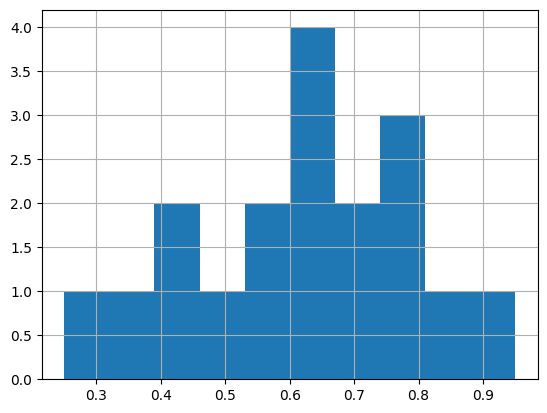

In [ ]:
Df1.Difference_Now.hist()

`Q23. For the above case, what is the null and alternative hypothesis?`

The null hypothesis, 'H0': "The diet was ineffective in lowering the cholesterol levels."

The alternative hypothesis, 'H1': "The diet was effective in lowering the cholesterol levels."

In our answer, we rejected the null hypothesis and accepted the alternate hypothesis."

`Q24. Was the margarine diet more effective in the first 4 weeks of use or the last 4 weeks of use? Justify your answer.`

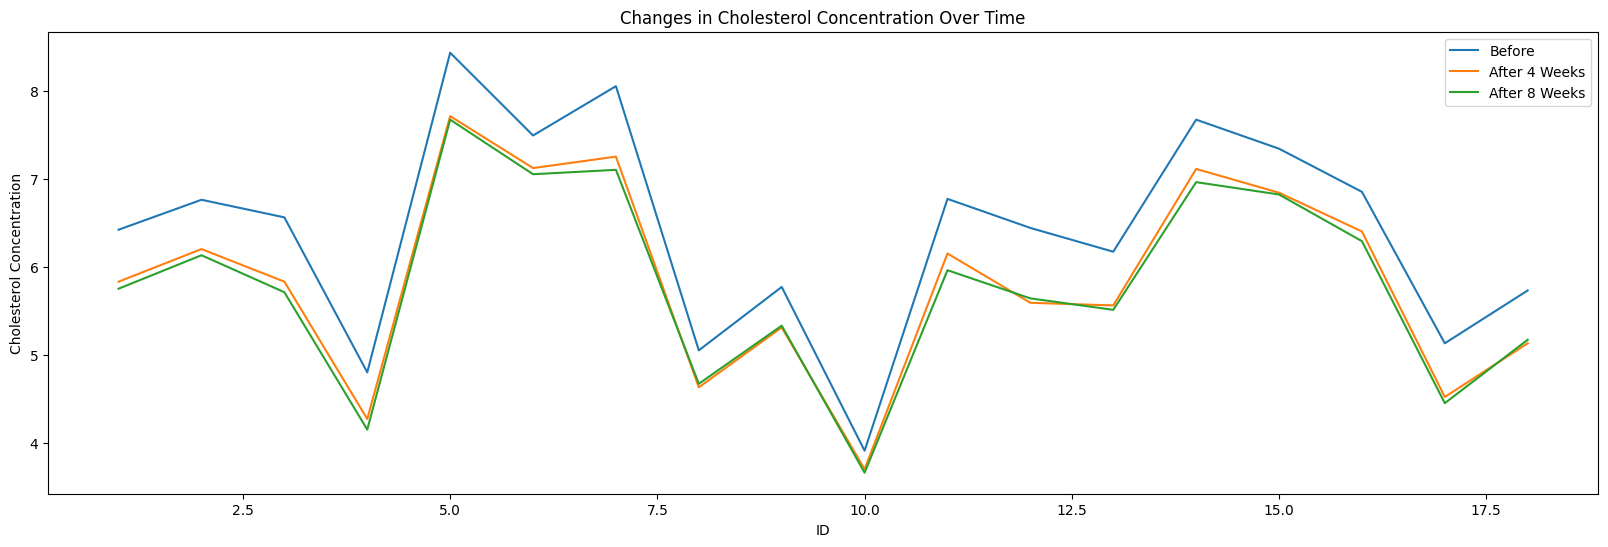

In [ ]:
# Assuming Df1 is your DataFrame

plt.figure(figsize=(20, 6))
plt.plot(Df1['ID'], Df1['Before'], label='Before')
plt.plot(Df1['ID'], Df1['After4weeks'], label='After 4 Weeks')
plt.plot(Df1['ID'], Df1['After8weeks'], label='After 8 Weeks')

# Add labels and title
plt.xlabel('ID')
plt.ylabel('Cholesterol Concentration')
plt.title('Changes in Cholesterol Concentration Over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()


I used a line plot showing the graph to compare the changes. The result is consistent. It clearly shows that changes in cholesterol was effective after the first four weeks but significantly weaker after eight weeks.

`Q25. If you know that the average cholesterol concentration in healthy adults is 3 mmol/L, would you consider your sample (N=18) significantly better or worse than average adult population? Justify your answer.`

In [ ]:
sample_mean = Df1['After8weeks'].mean()
population_mean = 3.0  # Average cholesterol concentration in healthy adults
sample_size = len(Df1)

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(Df1['After8weeks'], population_mean)

print("Sample Mean:", sample_mean)
print("Population Mean:", population_mean)
print("Sample Size:", sample_size)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The sample mean is significantly different from the population mean.")
else:
    print("The sample mean is not significantly different from the population mean.")


Sample Mean: 5.77888888888889
Population Mean: 3.0
Sample Size: 18
T-statistic: 10.69942528478202
P-value: 5.696836608393939e-09
The sample mean is significantly different from the population mean.


In [ ]:
statistic, p_value = shapiro(Df1['After4weeks'])
p_value

0.9120969176292419

In [ ]:
columns_to_calculate = ['Before', 'After4weeks', 'After8weeks']

for column in columns_to_calculate:
  column_mean = Df1[column].mean()
  print(f"Mean {column}: {column_mean}")


Mean Before: 6.407777777777778
Mean After4weeks: 5.841666666666666
Mean After8weeks: 5.77888888888889


I tested for normality for all variables involving cholesterol levels, the p-value = 0.9. So they are likely a normal distribution.

I performed a one-sample t-test on the three sets of cholesterol levels. The p-values for each of the variables are all way orders of magnitude less than 0.05. As a result, we cannot compare our sample means with the mean of the general population since the p-values show extreme insignificance in their relationship.

The lowest mean is the mean of the cholesterol after eight weeks with values of 5.77 > 3. This means that our results are bad compared to the population mean.